Group members: 

1 - Mohammad Kachmar    

2 - Serge Ohannessian

# 1- Data Import and Visualization
## a- Import the data from the file named "income.csv".

In [2]:
import pandas as pd
df = pd.read_csv('income.data.csv')

## b- Plot a scatter plot to visualize the training sample, assuming X is the income and y is the happiness.

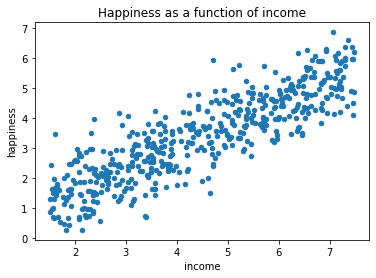

In [3]:
import matplotlib.pyplot as plt
df.plot(x="income",y="happiness",kind = 'scatter',title = "Happiness as a function of income")
plt.show()

## Comment on the linearity of the data.

The graph looks somewhat linear with a directly linear propertional relation between income and happiness. so we can guess an approximate relationship between income and happiness as the following equation: happiness = a.(income) + b (form: y= ax + b, just like a linear equation).
the reason behind this is because our given variables are either dependent or independent variables. We notice that happiness is dependent on income because when income increases results in the happiness increase, and when the income decreases the happiness decreases too.
So in conlusion, we can say income is an independent variable whereas happiness is a dependent variable that depends on income.

# 2- Modeling Happiness With Respect to Income
## a- Write the corresponding equations of a linear regression model.

Based on the observation made in question (1b), we can come up with the following linear regression model.
Htheta(X) = theta0 + theta1.X1
with:
Htheta(X) representing the happiness data that we are given in the excel sheet(which is our only output, or also called target).
Theta0 and theta1 representing the parameters that we have to find that will allow us to model the relationship between happiness and income.
X1 representing the income data that we are given in the excel sheet(which is our only input, or also called feature).

## b- What is the size of the model (number of parameters)?

There are 2 parameters in our linear regression model which are: theta0 and theta1. 
number of parameters = number of features + 1 = 1 + 1 = 2

# 3- Implement Batch Gradient Descent Algorithm

In [4]:
ep = 0.0001
max_iter = 10000
x = df['income'].tolist() #column of income
y = df['happiness'].tolist() #column of happiness
alpha = 0.01
converged = False
iter = 0
m = df.shape[0] # number of rows

# initial thetas
theta0 = 0
theta1 = 1

# compute initial error J(theta)
error = sum([(theta0 + theta1*x[i] - y[i])**2 for i in range(m)])

cost_batch = []
while not converged:
    grad0 = 1.0/m * sum([(theta0 + theta1*x[i] - y[i]) for i in range(m)]) 
    grad1 = 1.0/m * sum([(theta0 + theta1*x[i] - y[i])*x[i] for i in range(m)])

    # update the theta_temp
    temp0 = theta0 - alpha * grad0
    temp1 = theta1 - alpha * grad1

    theta0 = temp0
    theta1 = temp1

    # new error
    newError = sum( [ (theta0 + theta1*x[i] - y[i])**2 for i in range(m)] ) 

    if abs(error-newError) <= ep:
        print('Converged with', iter,' iterations')
        converged = True
    #check for number of iterations 
    if(iter > max_iter):
        print("number of iterations expired")
        break
    error = newError   # update error 
    iter += 1  # update iter
    cost_batch.append(error)
print("Theta0: ",str(theta0),", Theta1:",str(theta1))

Converged with 1836  iterations
Theta0:  0.17971472582780493 , Theta1: 0.718628002322554



## a- Specify the convergence criteria and the learning rate you used and any assumptions you made. 

There are three convergence criterias we have to take into consideration in our model:1- when it converges, 2- when time limit expires, 3- when it diverges-

The first case happens when we reach a point in our algorithm where the difference between the newError calculated and the previous error is smaller than a certain value epsilon. In our code above this condition is checked throughout the if statement (if abs(error-newError) <= ep).

the second and third scenario occurs when the number of iterations done by the algorithm exceeds the amount we specified. In this case we consider the algorithm took a very long time to converge OR might have diverged. In our code above this condition is checked throughout the if statement (if iter > max-iter).

The third scenario might also happen when we use bad combinations of epsilon and alpha values which will result in an overflow error, which means that our algorithm diverged.



Looking at the scatter plot we assumed Theta0 is close to 0 and Theta1 is close to 1 and accordingly chose their initial values.

We chose epsilon to be 0.0001 and maximum number of iterations allowed to be 10000. Then we ran tests with several values of alpha:

Initially we chose alpha to be 0.1 but immediately got an overflow error, meaning that our algorithm diverged.

then we chose alpha to be 0.01, where the algorithm converged with 1836 iterations(0.4s execution time) and gave us positive values for theta0 and theta1.

then we chose alpha to be 0.001, where the algorithm converged with 9256 iterations(2.5s execution time) and gave us positive values for theta0 and theta1.

then we chose alpha to be 0.0001, where the algorithm converged with 2881 iterations(0.7s execution time) and gave us negative value for theta0 and positive value for theta1.

finally we chose alpha to be 0.00001, where the number of iterations expired(2.2s execution time).

Observing the above results we ran a test with alpha to be 0.082 and saw that the algorithm converged with 324 iterations(0.1s execution time) and gave us two positive values for theta0 and theta1. That being said the value of alpha that gives the lowest number of iterations is alpha=0.082, given ep=0.0001 and max_iter=10000, which will give us:
Theta0:  0.19578464405525656 , Theta1: 0.7154850439116761.


In order to visualize the graph in part 5 properly, we kept the value of alpha to be 0.01.


## b-Save the error at each iteration in an array cost_batch.

In [5]:
print(cost_batch)

[661.9789641864458, 493.0967016414785, 395.13425051886395, 338.30799722036096, 305.342313492022, 286.2166781191615, 275.11880780092645, 268.67735721901806, 264.9368178867985, 262.76292050858063, 261.49774574208806, 260.7596753283778, 260.32735614156536, 260.07239492610745, 259.92031868555677, 259.8279302237956, 259.7701734980374, 259.7325150242011, 259.70652480237754, 259.68731308559154, 259.67204360823484, 259.6590712020276, 259.6474415804927, 259.63660119493204, 259.6262289398599, 259.61613853575875, 259.60622190736274, 259.5964163409123, 259.5866854341121, 259.5770080463803, 259.56737188957624, 259.5577698103758, 259.54819763390884, 259.5386529129868, 259.52913420260677, 259.5196406391361, 259.5101716962234, 259.50072704321707, 259.4913064630434, 259.481909804572, 259.47253695498506, 259.46318782375187, 259.45386233333295, 259.44456041378544, 259.4352819996382, 259.42602702807505, 259.4167954378833, 259.4075871688434, 259.3984021613733, 259.38924035632294, 259.3801016948569, 259.370

# 4-Implement Stochastic Gradient Descent


In [6]:
ep = 0.0001
max_iter = 10000
x = df['income'].tolist() #column of income
y = df['happiness'].tolist() #column of happiness
alpha = 0.0001
converged = False
iter = 0
m = df.shape[0] # number of rows

# initial thetas
theta0 = 0
theta1 = 1

# compute initial error J(theta)
error = sum([(theta0 + theta1*x[i] - y[i])**2 for i in range(m)])

cost_stochastic = []
while not converged:
    for i in range(m):
        # grad0 = 1.0/m * sum([(theta0 + theta1*x[i] - y[i]) for i in range(m)]) 
        # grad1 = 1.0/m * sum([(theta0 + theta1*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = theta0 - alpha * (theta0+theta1*x[i] - y[i])
        temp1 = theta1 - alpha * (theta0+theta1*x[i] - y[i])*x[i]

        theta0 = temp0
        theta1 = temp1

    # new error
    newError = sum( [ (theta0 + theta1*x[i] - y[i])**2 for i in range(m)] ) 

    if abs(error-newError) <= ep:
        print('Converged with', iter,' iterations')
        converged = True
    #check for divergerce 
    if(iter > max_iter):
        print("number of iterations expired")
        break
    error = newError   # update error 
    iter += 1  # update iter
    cost_stochastic.append(error)
#print("Theta0: ",str(theta0),", Theta1:",str(theta1))

Converged with 486  iterations


## a-Specify the convergence criteria and the learning rate you used and any assumptions you made. 

Same as the previous algorithm:

There are three convergence criterias we have to take into consideration in our model:1- when it converges, 2- when time limit expires, 3- when it diverges.

The first case happens when we reach a point in our algorithm where the difference between the newError calculated and the previous error is smaller than a certain value epsilon. In our code above this condition is checked throughout the if statement (if abs(error-newError) >= ep).

the second and third scenario occurs when the number of iterations done by the algorithm exceeds the amount we specified. In this case we consider the algorithm took a very long time to converge OR might have diverged. In our code above this condition is checked throughout the if statement (if iter > max-iter).

The third scenario might also happen when we use bad combinations of epsilon and alpha values which will result in an overflow error, which means that our algorithm diverged.

Looking at the scatter plot we assumed Theta0 is close to 0 and Theta1 is close to 1 and accordingly chose their initial values.

We chose epsilon to be 0.0001 and maximum number of iterations allowed to be 10000. Then we ran tests with several values of alpha:

Initially we chose alpha to be 0.1 but immediately got an overflow error, meaning that our algorithm diverged.

then we chose alpha to be 0.01, where the algorithm converged with 17 iterations(0.5s execution time) and gave us positive values for theta0 and theta1.

then we chose alpha to be 0.001, where the algorithm converged with 64 iterations(0.7s execution time) and gave us positive values for theta0 and theta1.

then we chose alpha to be 0.0001, where the algorithm converged with 486 iterations(0.7s execution time) and gave us positive values for theta0 and theta1.

then we chose alpha to be 0.00001, where the algorithm converged with 3131 iterations(0.7s execution time) and gave us positive values for theta0 and theta1.

finally we chose alpha to be 0.000001, where the number of iterations expired(2.3s execution time).

Observing the above results we ran a test with alpha to be 0.05 and saw that the algorithm converged with 4 iterations(0.4s execution time) and gave us two positive values for theta0 and theta1. That being said the value of alpha that gives the lowest iterations is alpha=0.05, given ep=0.0001 and max_iter=10000, which will give us:
Theta0:  0.33970743630349876 , Theta1: 0.7595199082723649

In order to visualize the graph in part 5 properly, we kept the value of alpha to be 0.0001.

## b- Save the error at each iteration in an array cost_stochastic.

In [7]:
print(cost_stochastic)

[323.7275652549009, 265.5928262033939, 260.23398542493555, 259.7149238936118, 259.6291353936344, 259.57925276358804, 259.53179181351175, 259.48465877446966, 259.4379610101109, 259.39179518772784, 259.3461919375585, 259.3011561036795, 259.2566842342553, 259.2127703741728, 259.16940786615817, 259.12658990036897, 259.0843096806776, 259.04256047437775, 259.00133562652144, 258.9606285635288, 258.9204327935667, 258.8807419059418, 258.841549570215, 258.80284953523443, 258.76463562815474, 258.7269017534599, 258.68964189199676, 258.65285010001764, 258.6165205082375, 258.5806473209005, 258.54522481486106, 258.51024733867246, 258.47570931168997, 258.44160522318447, 258.4079296314669, 258.37467716302325, 258.34184251166096, 258.3094204376664, 258.277405766972, 258.24579339033386, 258.2145782625218, 258.1837554015136, 258.15331988770885, 258.1232668631436, 258.09359153071836, 258.06428915343935, 258.035355053662, 258.006784612349, 257.978573268338, 257.950716517614, 257.9232099125963, 257.896049061

# 5- Ploting cost_batch and cost_stochastic versus the number of iterations.

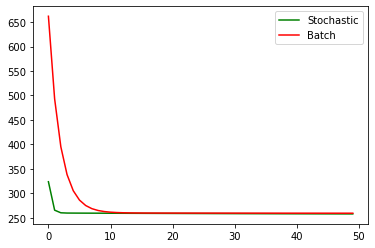

In [8]:
import numpy as np
size = 50
index = np.arange(0,size)
plt.plot(index,cost_stochastic[:size], color ="green")
plt.plot(index,cost_batch[:size],color = "red")
plt.legend(["Stochastic","Batch"])
plt.show()

# Comment

Even though the learning rate of the SGD is much slower than the BGD(0.0001 < 0.01) it reached convergence in much less iterations than in BGD.

from the graph we can see that the red curve(BGD) is very smooth compared to the green curve(SGD), we see some zigzags in the green curve, while the red curve is almost perfect.

This shows that the SGD algorithm creates a tradoff between performance and speed with the SGD algorithm successfully converging in a very fast manner by finding values of theta0 and theta1.

The graph of SGD shows this weakness of the algorithm by presenting a less smoother curve and a noisier one. 

# 6- Consider the model obtained by stochastic gradient descent
## a- Print the optimal parameters.

In [9]:
print("Theta0: ",str(theta0),", Theta1:",str(theta1))

Theta0:  0.19407366106551519 , Theta1: 0.7157045919048397


## What is the intercept?

The intercept is Theta0 = 0.1940736610655148

## b- What was the average mean square error?

In [10]:
print(error)

255.77840478962636


## c- On the scatter plot of the training samples, show the linear regression model that you obtained (a line).

C:\Users\moham\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


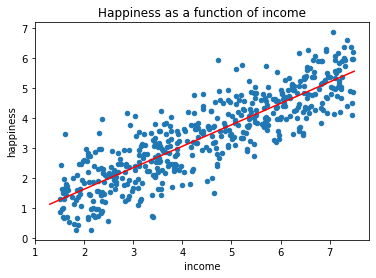

In [11]:

df.plot(x="income",y="happiness",kind = 'scatter',title = "Happiness as a function of income")
ax = plt.axes()
x = np.linspace(1.3,7.5,100)
ax.plot(x, x*theta1+theta0,color = 'red')
plt.show()

## d- Use your model to predict the happiness of someone with income 2.5.

In [12]:
x = 2.5
print("Predicted Happiness: ",x*theta1+theta0)

Predicted Happiness:  1.9833351408276143


# 7- Derive the optimal parameters using normal equations

In [13]:
x = df['income'].tolist() #column of income
y = df['happiness'].tolist()


for i in range(len(x)):
    x[i] = [1,x[i]]
x = np.array(x)
y = np.array(y)

result1 = np.matmul(x.transpose(),x)
result2 = np.matmul(x.transpose(),y)

result1 = np.linalg.inv(result1)

result = np.matmul(result1,result2)

print("Theta0: ",result[0]," Theta1: ",result[1])

Theta0:  0.20427039620417153  Theta1:  0.7138255122802086
